In [1]:
import os
import pprint
import shutil
import time
from pathlib import Path
import numpy as np
from typing import List, Tuple, Union, Optional, Callable, Any, Dict, Generator
from itertools import islice

import matplotlib.pyplot as plt
import zarr
from ome_zarr.reader import Reader
from ome_zarr.io import parse_url
from ome_zarr.writer import write_image
import tifffile
from matplotlib.pyplot import imshow

from torch.utils.data import DataLoader, Dataset, IterableDataset, get_worker_info


In [117]:
path = "/localscratch/data/test_ngff_image.zarr"
os.mkdir(path)

size_xy = 457
size_z = 23
chunk_size_xy = 128
chunk_size_z = 1
rng = np.random.default_rng(0)
data = rng.poisson(lam=10, size=(size_z, size_xy, size_xy)).astype(np.uint8)

# write the image data
store = parse_url(path, mode="w").store
root = zarr.group(store=store)
write_image(image=data, group=root, axes="zyx", storage_options=dict(chunks=(chunk_size_z, chunk_size_xy, chunk_size_xy)), scaler=None)

[]

In [3]:
path = "/localscratch/data/test_ngff_image.zarr"
test_zarr_loc = parse_url(path)
test_zarr_loc.exists()
test_reader = Reader(test_zarr_loc)
test_nodes = list(test_reader())
test_nodes[0].data


/localscratch/mamba/envs/cmcs/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


[dask.array<from-zarr, shape=(23, 457, 457), dtype=uint8, chunksize=(1, 128, 128), chunktype=numpy.ndarray>]

In [119]:
test_nodes[0].data[0]

dask.array<from-zarr, shape=(23, 457, 457), dtype=uint8, chunksize=(1, 128, 128), chunktype=numpy.ndarray>

In [34]:
m[0].rechunk((1, 64, 64))

dask.array<rechunk-merge, shape=(10, 128, 128), dtype=uint8, chunksize=(1, 64, 64), chunktype=numpy.ndarray>

dask.array<from-zarr, shape=(10, 128, 128), dtype=uint8, chunksize=(1, 128, 128), chunktype=numpy.ndarray>

In [38]:
m[0].compute()

(10, 128, 128)

In [3]:
import zarr

In [85]:
zarr_dir = '/localscratch/data/ftp.ebi.ac.uk/pub/databases/IDR/idr0138-lohoff-seqfish/20210917-Globus/ngff/TimEmbryos-102219/HybCycle_0'
data_path = '/localscratch/data/ftp.ebi.ac.uk/pub/databases/IDR/idr0138-lohoff-seqfish/20210917-Globus/ngff/TimEmbryos-102219/HybCycle_0/MMStack_Pos0.ome.zarr'

zarr_loc = parse_url(data_path)

In [13]:
fs = zarr.storage.FSStore(data_path)


z = zarr.open(store=fs, mode='r')

In [ ]:
# List all subdirectories ending with '.zarr'
zarr_paths = [
    os.path.join(zarr_dir, name)
    for name in os.listdir(zarr_dir)
    if os.path.isdir(os.path.join(zarr_dir, name)) and name.endswith('.zarr')
]


In [86]:
zarr_loc

/localscratch/data/ftp.ebi.ac.uk/pub/databases/IDR/idr0138-lohoff-seqfish/20210917-Globus/ngff/TimEmbryos-102219/HybCycle_0/MMStack_Pos0.ome.zarr [zgroup]

In [87]:
zarr_loc.exists()


True

In [88]:
reader = Reader(zarr_loc)

In [89]:
nodes = list(reader())

/localscratch/mamba/envs/cmcs/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
no parent found for <ome_zarr.reader.Label object at 0x7f343ff15c60>: None


no parent found for <ome_zarr.reader.Label object at 0x7f343ff15ea0>: None


In [90]:
nodes

[/localscratch/data/ftp.ebi.ac.uk/pub/databases/IDR/idr0138-lohoff-seqfish/20210917-Globus/ngff/TimEmbryos-102219/HybCycle_0/MMStack_Pos0.ome.zarr [zgroup],
 /localscratch/data/ftp.ebi.ac.uk/pub/databases/IDR/idr0138-lohoff-seqfish/20210917-Globus/ngff/TimEmbryos-102219/HybCycle_0/MMStack_Pos0.ome.zarr/labels [zgroup] (hidden),
 /localscratch/data/ftp.ebi.ac.uk/pub/databases/IDR/idr0138-lohoff-seqfish/20210917-Globus/ngff/TimEmbryos-102219/HybCycle_0/MMStack_Pos0.ome.zarr/labels/cells [zgroup] (hidden),
 /localscratch/data/ftp.ebi.ac.uk/pub/databases/IDR/idr0138-lohoff-seqfish/20210917-Globus/ngff/TimEmbryos-102219/HybCycle_0/MMStack_Pos0.ome.zarr/labels/nuclei [zgroup] (hidden)]

In [37]:
# fnr = nodes[0].data[0].rechunk((1, 1, 64, 64))

In [91]:
nodes[0].data[0]

dask.array<from-zarr, shape=(4, 6, 2048, 2048), dtype=uint16, chunksize=(1, 1, 512, 512), chunktype=numpy.ndarray>

In [11]:
imn = nodes[0].data[0].compute()


In [67]:
nodes[0].data[0].chunksize

(1, 1, 1, 1024, 1024)

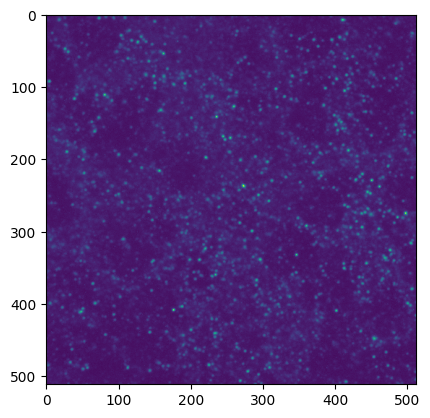

In [60]:
plt.imshow(imn[0, 0, 512:1024, 512:1024])

In [14]:
nodes[0].metadata

{'axes': [{'name': 'c', 'type': 'channel'},
  {'name': 'z', 'type': 'space', 'unit': 'micrometer'},
  {'name': 'y', 'type': 'space', 'unit': 'micrometer'},
  {'name': 'x', 'type': 'space', 'unit': 'micrometer'}],
 'name': 'image',
 'coordinateTransformations': [[{'scale': [1.0, 4.0, 0.11, 0.11],
    'type': 'scale'}],
  [{'scale': [1.0, 4.0, 0.22, 0.22], 'type': 'scale'}],
  [{'scale': [1.0, 4.0, 0.44, 0.44], 'type': 'scale'}],
  [{'scale': [1.0, 4.0, 0.88, 0.88], 'type': 'scale'}],
  [{'scale': [1.0, 4.0, 1.76, 1.76], 'type': 'scale'}]]}

In [69]:
url = "https://uk1s3.embassy.ebi.ac.uk/bia-integrator-data/EMPIAR-10310/IM1/IM1.zarr/0"

# read the image data
store = parse_url(url, mode="r").store

reader = Reader(parse_url(url))
# nodes may include images, labels etc
nodes = list(reader())
# first node will be the image pixel data
image_node = nodes[0]

dask_data = image_node.data

/localscratch/mamba/envs/cmcs/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


In [72]:
image_node.data[0]

dask.array<from-zarr, shape=(1, 1, 1966, 3703, 3337), dtype=uint8, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

In [73]:
ta = dask_data[0][0,0,-1, :1024, :1024].compute()

In [ ]:
# TODO map_chunks with all operations
# TODO iter vs getitem

# simultaneous .compute

In [80]:
pa = dask_data[0][0,0,-1, :1024, :1024].compute()

In [87]:
ta2 = dask_data[0][0,0,-2, :1024, :1024].compute()

In [74]:
import psutil

In [75]:
pr = psutil.Process()

print(pr.memory_info())

pmem(rss=913690624, vms=5963218944, shared=169201664, text=2490368, lib=0, data=1875046400, dirty=0)


In [88]:
pr.memory_info()

pmem(rss=925437952, vms=5975945216, shared=169201664, text=2490368, lib=0, data=1887793152, dirty=0)

In [5]:
from careamics.dataset.patching.validate_patch_dimension import validate_patch_dimensions


In [6]:
from careamics.config import DataConfig
from careamics.config.transformations import NormalizeModel
from careamics.transforms import Compose
from careamics.dataset.patching.patching import Stats

In [10]:
def read_ome_zarr(path: str) -> list:
    """_summary_.

    _extended_summary_

    Parameters
    ----------
    path : str
        local path or url
    """
    zarr_loc = parse_url(path)
    assert zarr_loc.exists()

    reader = Reader(test_zarr_loc)

    nodes = list(reader())
    return nodes


In [7]:
from careamics.dataset.patching.sequential_patching import _compute_number_of_patches, _compute_overlap, _compute_patch_steps
from skimage.util import view_as_windows

In [40]:
arr = np.random.rand(2, 1024, 1024)
patch_size = (64, 64)

In [42]:
overlaps = _compute_overlap(arr_shape=arr.shape, patch_sizes=(1, *patch_size))

    # Create view window and overlaps
window_steps = _compute_patch_steps(patch_sizes=(1, *patch_size), overlaps=overlaps)

In [ ]:
?view_as_windows

In [44]:
patches = view_as_windows(arr, window_shape=(1, *patch_size), step=window_steps)

In [45]:
patches.shape

(2, 16, 16, 1, 64, 64)

In [48]:
grid_shape = patches.shape[:-len((1, *patch_size))]

In [49]:
grid_shape

(2, 16, 16)

In [50]:
mg = np.meshgrid(*[range(i) for i in grid_shape], sparse=True)

In [51]:
len(mg)

3

In [57]:
mg

[array([[[0],
         [1]]]),
 array([[[ 0]],
 
        [[ 1]],
 
        [[ 2]],
 
        [[ 3]],
 
        [[ 4]],
 
        [[ 5]],
 
        [[ 6]],
 
        [[ 7]],
 
        [[ 8]],
 
        [[ 9]],
 
        [[10]],
 
        [[11]],
 
        [[12]],
 
        [[13]],
 
        [[14]],
 
        [[15]]]),
 array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]]])]

In [52]:
for d in mg:
    print(d.shape)



(1, 2, 1)
(16, 1, 1)
(1, 1, 16)


In [53]:
np.prod(grid_shape)

512

In [55]:
for d in range(len(arr.shape)):
    print(np.arange(0, arr.shape[d])[slice(0, arr.shape[d], (1, *patch_size)[d])])

[0 1]
[  0  64 128 192 256 320 384 448 512 576 640 704 768 832 896 960]
[  0  64 128 192 256 320 384 448 512 576 640 704 768 832 896 960]


In [84]:
len(np.array_split(np.arange(31456*512), 3703)[-1])

4349

In [56]:
shape = (1, 1, 1966, 3703, 3337)
n_p = 31456 * 512

cd = {}
for i in range(n_p):
    cd[i] = 

93

In [4]:
class TestZarrDataset(Dataset):
    def __init__(
        self,
        zarr_array,
        patch_size=(1, 1, 1, 32, 32)
    ) -> None:
        self.data = zarr_array

        self.chunk_size = np.array(zarr_array.chunksize)
        self.data_shape = np.array(zarr_array.shape)

        # patch_size adjusted to the number of dimensions
        self.patch_size = patch_size
        assert len(self.patch_size) == len(self.data_shape)
        self.patches_per_dimension = np.ceil(
            self.data_shape / self.patch_size
        ).astype(np.uint32)

        self.patches_per_chunk = (self.chunk_size // patch_size).clip(1)
        if any(self.patch_size > self.chunk_size):
            print("Larger patch than chunk size")

        self.len = np.prod(self.patches_per_dimension)
        self.indices = np.arange(self.len)
        self.indices_map = self.indices.reshape(self.patches_per_dimension)

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        data_index = self.indices[index]
        index_location = np.argwhere(data_index == self.indices_map)

        patch_start = index_location * self.patch_size
        patch_end = ((index_location + 1) * self.patch_size)

        if (patch_end > self.data_shape).any():
            patch_end = np.where(patch_end > self.data_shape, self.data_shape, patch_end)
            patch_start = patch_end - self.patch_size

        patches = np.dstack((patch_start, patch_end)).squeeze()
        slices = [slice(s, e) for s, e in patches]
        chunk = self.data[tuple(slices)].compute()
        chunk = chunk.astype(np.float32)
        chunk = torch.tensor(chunk, dtype=torch.float32)
        return chunk


In [5]:
test_arr = test_nodes[0].data[0]

In [6]:
test_arr

dask.array<from-zarr, shape=(23, 457, 457), dtype=uint8, chunksize=(1, 128, 128), chunktype=numpy.ndarray>

In [7]:
ds = TestZarrDataset(test_arr, patch_size=(1, 64, 64))

In [15]:
for s in ds:
    print(s.shape)

In [23]:
class SingleZarrDataset(Dataset):
    """Dataset to extract patches from a zarr storage."""

    def __init__(
        self,
        data_config: DataConfig,
        src_files: list[Path],
        target_files: Optional[list[Path]] = None,
    ) -> None:
        self.data_config = data_config
        self.data_files = src_files
        self.target_files = target_files

        if not self.data_config.image_means:
            self.image_stats, self.target_stats = self._calculate_mean_and_std()
            # logger.info(
            #     f"Computed dataset mean: {self.image_stats.means},"
            #     f"std: {self.image_stats.stds}"
            # )

            # update the mean in the config
            self.data_config.set_means_and_stds(
                image_means=self.image_stats.means,
                image_stds=self.image_stats.stds,
                target_means=(
                    list(self.target_stats.means)
                    if self.target_stats.means is not None
                    else None
                ),
                target_stds=(
                    list(self.target_stats.stds)
                    if self.target_stats.stds is not None
                    else None
                ),
            )

        else:
            # if mean and std are provided in the config, use them
            self.image_stats, self.target_stats = (
                Stats(self.data_config.image_means, self.data_config.image_stds),
                Stats(self.data_config.target_means, self.data_config.target_stds),
            )

        self.nodes = read_ome_zarr(self.data_path)
        # 0 is the index of the image node
        self.data = self.nodes[0]
        # TODO assert target files and nodes[1] are mutually exclusive
        if self.nodes[1].visible:
            self.targets = self.nodes[1]
        elif self.target_files:
            self.targets = read_ome_zarr(self.target_path)[0]
        else:
            self.targets = None
        # TODO assert targets and data have the same shape
        
        self.num_pathes_per_chunk = self._compute_num_patches_per_chunk()

    def _compute_num_patches_per_chunk(self):
        """Num patches per chunk."""
        # TODO implement this
        pass

    def __len__(self) -> int:
        # index 0 is the highest resolution level
        return self.data.data[0].npartitions * self.num_pathes_per_chunk

    def _patch_chunk_mapping(self):
        """Stores the mapping of patches to chunks.

        In order not to load a chunk multiple times, we cache the mapping of patch
        indices to a specific chunk.

        Parameters
        ----------
        self : _type_
            _description_
        """
        # split the whole len across respective dims
        # 
        pass

    def __getitem__(self, index: int) -> np.array:
        """
        Returns single patch.

        Parameters
        ----------
        index : int
            Index of the patch to return.

        Returns
        -------
        np.ndarray
        """
        

In [24]:
dataset = ZarrDataset(
                data_path=reg_path,
                axes=axes,
                patch_extraction_method='random',
                patch_size=patch_size,
            )

In [27]:
dl = DataLoader(dataset, batch_size=32, num_workers=4,
                # prefetch_factor=8
                )

In [28]:
for i, batch in enumerate(dl):
    print(i, batch.shape)

0 torch.Size([32, 64, 64])
1 torch.Size([32, 64, 64])
2 torch.Size([32, 64, 64])
3 torch.Size([32, 64, 64])
4 torch.Size([32, 64, 64])
5 torch.Size([32, 64, 64])
6 torch.Size([32, 64, 64])
7 torch.Size([32, 64, 64])
8 torch.Size([32, 64, 64])
9 torch.Size([32, 64, 64])
10 torch.Size([32, 64, 64])
11 torch.Size([32, 64, 64])
12 torch.Size([32, 64, 64])
13 torch.Size([32, 64, 64])
14 torch.Size([32, 64, 64])
15 torch.Size([32, 64, 64])
16 torch.Size([32, 64, 64])
17 torch.Size([32, 64, 64])
18 torch.Size([32, 64, 64])
19 torch.Size([32, 64, 64])
20 torch.Size([32, 64, 64])
21 torch.Size([32, 64, 64])
22 torch.Size([32, 64, 64])
23 torch.Size([32, 64, 64])
24 torch.Size([32, 64, 64])
25 torch.Size([32, 64, 64])
26 torch.Size([32, 64, 64])
27 torch.Size([32, 64, 64])
28 torch.Size([32, 64, 64])
29 torch.Size([32, 64, 64])
30 torch.Size([32, 64, 64])
31 torch.Size([32, 64, 64])
32 torch.Size([32, 64, 64])
33 torch.Size([32, 64, 64])
34 torch.Size([32, 64, 64])
35 torch.Size([32, 64, 64])
36

KeyboardInterrupt: 